<a href="https://colab.research.google.com/github/Witcape/Emotion_Recognition_in_Live_Video_Data/blob/main/Emotion_Recognition_in_Video_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEP 1 - Import all the Libraries and google drive

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sklearn
import tensorflow as tf
import pandas as pd
import sklearn
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.activations import linear,relu,sigmoid
import cv2
import os
import PIL
from google.colab.patches import cv2_imshow
import pathlib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.preprocessing import image
import tensorflow_datasets as tfds

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Step 2 - Loading Data & Preprocessing

In [ ]:
# train_data_dir = '/content/gdrive/MyDrive/Human emotions/train'
# test_data_dir = '/content/gdrive/MyDrive/Human emotions/test'

In [ ]:
# picture_size = 48
# batch_size = 32
# no_of_classes = 7
# epochs = 20

# datagen_train = ImageDataGenerator (
#                                     rescale=1./255,
#                                     validation_split=0.2
#                                     )

# datagen_val   = ImageDataGenerator (
#                                     rescale=1./255
#                                     )
# datagen_test   = ImageDataGenerator (
#                                     rescale=1./255
#                                     )

In [ ]:
# train_set = datagen_train.flow_from_directory(
#     train_data_dir,
#     target_size=(picture_size, picture_size),
#     color_mode="grayscale",
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=True
# )

# val_set = datagen_val.flow_from_directory(
#     test_data_dir,

#     target_size=(picture_size, picture_size),
#     color_mode="grayscale",
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )



Found 29031 images belonging to 7 classes.
Found 7378 images belonging to 7 classes.


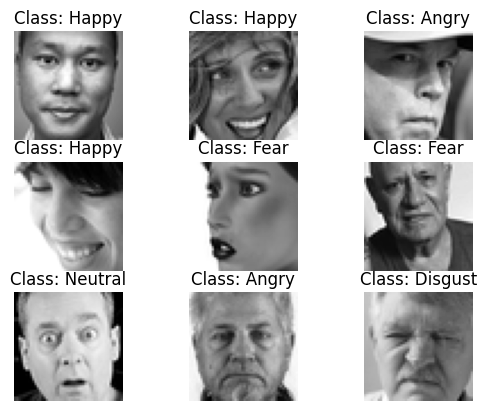

In [ ]:
# class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# count = 0
# for batch_images, batch_labels in train_set:
#     for i in range(batch_size):

#         if count < 9:
#             plt.subplot(3, 3, count + 1)
#             plt.imshow(batch_images[i].reshape(picture_size, picture_size), cmap='gray')
#             class_index = batch_labels[i].argmax()
#             class_name = class_names[class_index]
#             plt.title(f'Class: {class_name}')
#             plt.axis('off')
#             count += 1

#     if count >= 9:
#         break

# plt.show()


## Step 3 - Model

In [ ]:
model = Sequential(
    [
        Conv2D(128, (3,3), 1,  activation = 'relu', padding='same', input_shape = (picture_size, picture_size, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        BatchNormalization(),

        Conv2D(256, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(512, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(256, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Conv2D(128, (3,3), 1,  activation = 'relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),

        Flatten(),

        Dense(512, activation = 'relu'),
        Dense(7, activation = 'softmax')
    ]
)

In [ ]:
# model.compile(
#     optimizer = Adam(learning_rate = 0.01),
#     loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [ ]:
model.summary()

In [ ]:
# log_dir = '/content/gdrive/MyDrive/Human emotions/Logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [ ]:
# early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3, monitor='val_loss', min_lr=0.00001)

In [ ]:

# history = model.fit(
#     train_set,
#     epochs=2,
#     validation_data=val_set,
#     callbacks=[early_stopping, reduce_lr]
# )

In [ ]:
loaded_model = load_model('/content/gdrive/MyDrive/Human emotions/val_acc_61', compile=False)

loaded_model.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#predictions = loaded_model.predict(val_set)

In [ ]:
#predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
#accuracy = loaded_model.evaluate(val_set)[1]

In [ ]:
# def image_test(image_path):
#   image = cv2.imread(image_path)
#   img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   img = cv2.resize(img, (48, 48))
#   img_array = img_to_array(img)
#   img_array = np.expand_dims(img_array, axis=0)
#   img_array /= 255.0
#   return img, img_array

In [ ]:
# image_path = '/content/Screenshot 2023-08-18 at 2.06.53 PM.png'
# img, img_array = image_test(image_path)

In [ ]:
# predictions = loaded_model.predict(img_array)
# predicted_class = np.argmax(predictions[0])
# emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# predicted_emotion = emotion_labels[predicted_class]
# predicted_emotion

In [ ]:
# plt.imshow(img)
# plt.title(predicted_emotion)
# plt.axis('off')
# plt.show()

## Trying to make it work with video frames

In [ ]:
def preprocess(frame):
    img = image.array_to_img(frame)
    img = img.resize((48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [ ]:
def overlay_emoji(frame, emoji):
    # Define the position and size for overlay
    x_position = 100  # Adjust as needed
    y_position = 100  # Adjust as needed
    emoji_height, emoji_width, _ = emoji.shape
    emoji_size = (emoji_width, emoji_height)

    # Resize emoji to the desired size
    resized_emoji = cv2.resize(emoji, emoji_size)

    # Overlay emoji on the frame
    for y in range(emoji_height):
        for x in range(emoji_width):
            if emoji[y, x].any() > 0:
                frame[y + y_position, x + x_position] = emoji[y, x]

    return frame


In [ ]:
import cv2
import numpy as np
from IPython.display import display, clear_output
import PIL

# Load your emoji images (replace with actual local paths)
emoji_angry = cv2.imread('E:/ML/face_to_emoji/angry.png', cv2.IMREAD_UNCHANGED)
emoji_disgusted = cv2.imread('E:/ML/face_to_emoji/angry.png', cv2.IMREAD_UNCHANGED)
emoji_fearful = cv2.imread('E:/ML/face_to_emoji/sad.png', cv2.IMREAD_UNCHANGED)
emoji_happy = cv2.imread('E:/ML/face_to_emoji/happy.png', cv2.IMREAD_UNCHANGED)
emoji_neutral = cv2.imread('E:/ML/face_to_emoji/sad.png', cv2.IMREAD_UNCHANGED)
emoji_sad = cv2.imread('E:/ML/face_to_emoji/sad.png', cv2.IMREAD_UNCHANGED)
emoji_surprised = cv2.imread('E:/ML/face_to_emoji/happy.png', cv2.IMREAD_UNCHANGED)

# Load your emotion recognition model
model = loaded_model  # Replace with the actual path to your model

# Initialize face cascade
face_cascade = cv2.CascadeClassifier('E:/ML/face_to_emoji/haarcascade_frontalface_default.xml')

# Function to capture and process webcam feed
def process_webcam_frame(emoji, model):
    cap = cv2.VideoCapture(0)  # Use the appropriate camera index

    resize_scale = 0.5  # Adjust this value to your preference

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        small_frame = cv2.resize(frame, None, fx=resize_scale, fy=resize_scale)
        gray_frame = cv2.cvtColor(small_frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_region = gray_frame[y:y+h, x:x+w]
            processed_face = cv2.resize(face_region, (48, 48)) / 255.0

            predicted_emotion = model.predict(np.expand_dims(processed_face, axis=0))
            predicted_emotion = np.argmax(predicted_emotion)

            # Select emoji based on predicted emotion
            if predicted_emotion == 0:  # Angry
                emoji_overlay = emoji_angry
            elif predicted_emotion == 1:  # Disgusted
                emoji_overlay = emoji_disgusted
            elif predicted_emotion == 2:  # Fearful
                emoji_overlay = emoji_fearful
            elif predicted_emotion == 3:  # Happy
                emoji_overlay = emoji_happy
            elif predicted_emotion == 4:  # Neutral
                emoji_overlay = emoji_neutral
            elif predicted_emotion == 5:  # Sad
                emoji_overlay = emoji_sad
            elif predicted_emotion == 6:  # Surprised
                emoji_overlay = emoji_surprised

            emoji_resized = cv2.resize(emoji_overlay, (w, h))

            for i in range(h):
                for j in range(w):
                    if emoji_resized[i, j, 3] != 0:
                        small_frame[y + i, x + j] = emoji_resized[i, j, 0:3]

        frame_pil = PIL.Image.fromarray(cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB))
        clear_output(wait=True)
        display(frame_pil)



    cap.release()
    cv2.destroyAllWindows()

# Start processing the webcam feed
process_webcam_frame(emoji_happy, model)  # Pass the appropriate emoji and model